In [1]:
import plotly.express as px
import json
import pandas as pd
import kaleido

In [2]:
df = pd.read_csv('/Users/danielfiuzadosil/Documents/GitHub_Repo/Data-Science/Real State/Idealista/idealista_search10212022_14:20.csv')

In [3]:
len(df)

700

In [4]:
df.describe()

,Unnamed: 0,propertyCode,numPhotos,price,size,rooms,bathrooms,latitude,longitude,distance,priceByArea,parkingSpace.parkingSpacePrice
count,700.000000,7.000000e+02,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,16.000000
mean,24.500000,9.683412e+07,25.387143,194428.597143,91.900000,2.641429,1.668571,43.356921,-8.408005,2670.900000,2211.407143,19380.125000
std,14.441189,4.985851e+06,10.082073,57047.096922,27.114894,1.021233,0.520136,0.011826,0.012210,1134.317168,719.293648,8256.628867
min,0.000000,3.302544e+07,1.000000,35000.000000,25.000000,0.000000,1.000000,43.333078,-8.448702,42.000000,389.000000,82.000000
25%,12.000000,9.689466e+07,18.000000,154000.000000,75.000000,2.000000,1.000000,43.348302,-8.416790,2208.250000,1742.000000,17250.000000
50%,24.500000,9.799650e+07,25.000000,195000.000000,90.000000,3.000000,2.000000,43.356495,-8.408963,2620.500000,2100.000000,20000.000000
75%,37.000000,9.878815e+07,31.000000,239078.250000,107.000000,3.000000,2.000000,43.363504,-8.400198,3396.250000,2597.000000,21250.000000
max,49.000000,9.927073e+07,73.000000,300000.000000,347.000000,8.000000,3.000000,43.383275,-8.338537,4995.000000,7500.000000,35000.000000


In [5]:
df.columns

Index(['Unnamed: 0', 'propertyCode', 'thumbnail', 'externalReference',
       'numPhotos', 'floor', 'price', 'propertyType', 'operation', 'size',
       'exterior', 'rooms', 'bathrooms', 'address', 'province', 'municipality',
       'district', 'country', 'latitude', 'longitude', 'showAddress', 'url',
       'distance', 'description', 'hasVideo', 'status', 'newDevelopment',
       'hasLift', 'priceByArea', 'hasPlan', 'has3DTour', 'has360',
       'hasStaging', 'superTopHighlight', 'topNewDevelopment',
       'detailedType.typology', 'suggestedTexts.subtitle',
       'suggestedTexts.title', 'parkingSpace.hasParkingSpace',
       'parkingSpace.isParkingSpaceIncludedInPrice',
       'detailedType.subTypology', 'labels', 'neighborhood',
       'parkingSpace.parkingSpacePrice', 'newDevelopmentFinished'],
      dtype='object')

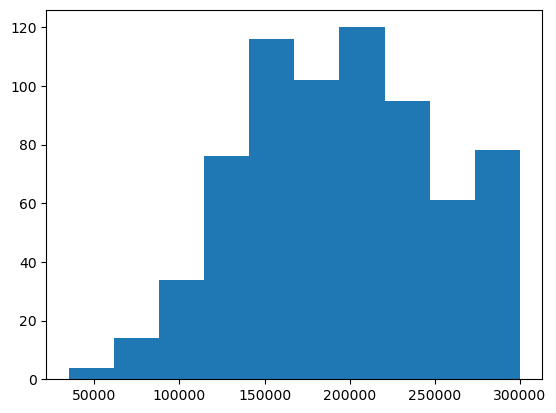

In [6]:
import matplotlib.pyplot as plt
plt.hist(df['price'])
plt.show()

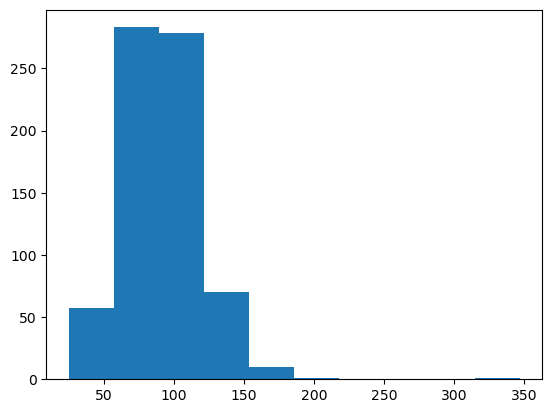

In [7]:
plt.hist(df['size'])
plt.show()

Text(0, 0.5, 'Size')

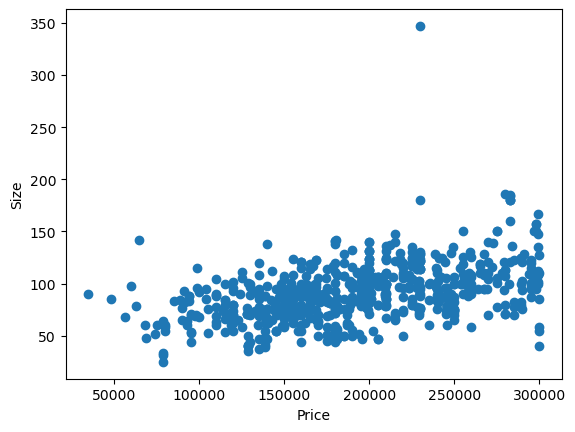

In [8]:
plt.scatter(df['price'], df['size'])
plt.xlabel('Price')
plt.ylabel('Size')

Text(0, 0.5, 'Rooms')

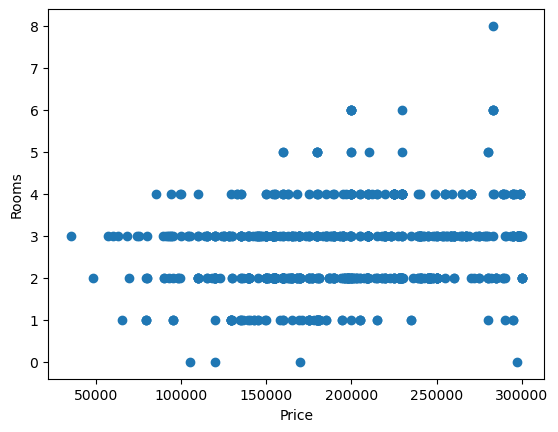

In [9]:
plt.scatter(df['price'], df['rooms'])
plt.xlabel('Price')
plt.ylabel('Rooms')

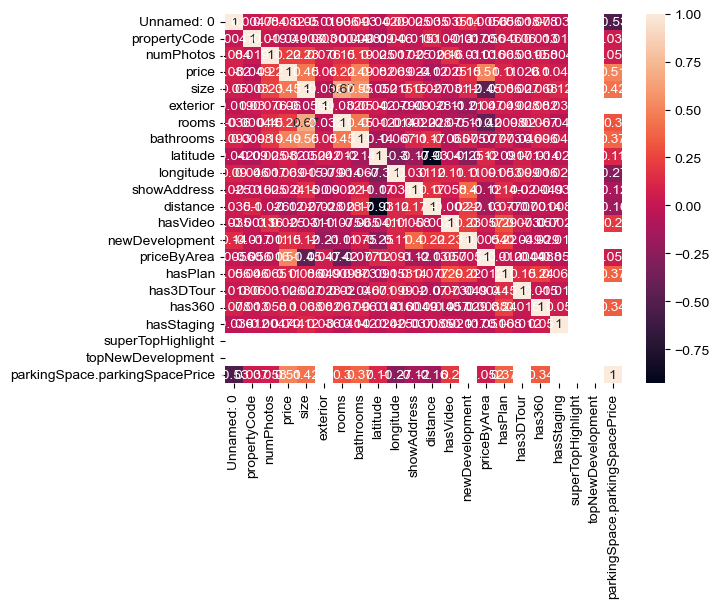

In [10]:
import seaborn as sn
sn.heatmap(df.corr(), annot=True)
sn.set(rc={'figure.figsize':(15,15)})
plt.show()


In [11]:

df.columns

Index(['Unnamed: 0', 'propertyCode', 'thumbnail', 'externalReference',
       'numPhotos', 'floor', 'price', 'propertyType', 'operation', 'size',
       'exterior', 'rooms', 'bathrooms', 'address', 'province', 'municipality',
       'district', 'country', 'latitude', 'longitude', 'showAddress', 'url',
       'distance', 'description', 'hasVideo', 'status', 'newDevelopment',
       'hasLift', 'priceByArea', 'hasPlan', 'has3DTour', 'has360',
       'hasStaging', 'superTopHighlight', 'topNewDevelopment',
       'detailedType.typology', 'suggestedTexts.subtitle',
       'suggestedTexts.title', 'parkingSpace.hasParkingSpace',
       'parkingSpace.isParkingSpaceIncludedInPrice',
       'detailedType.subTypology', 'labels', 'neighborhood',
       'parkingSpace.parkingSpacePrice', 'newDevelopmentFinished'],
      dtype='object')

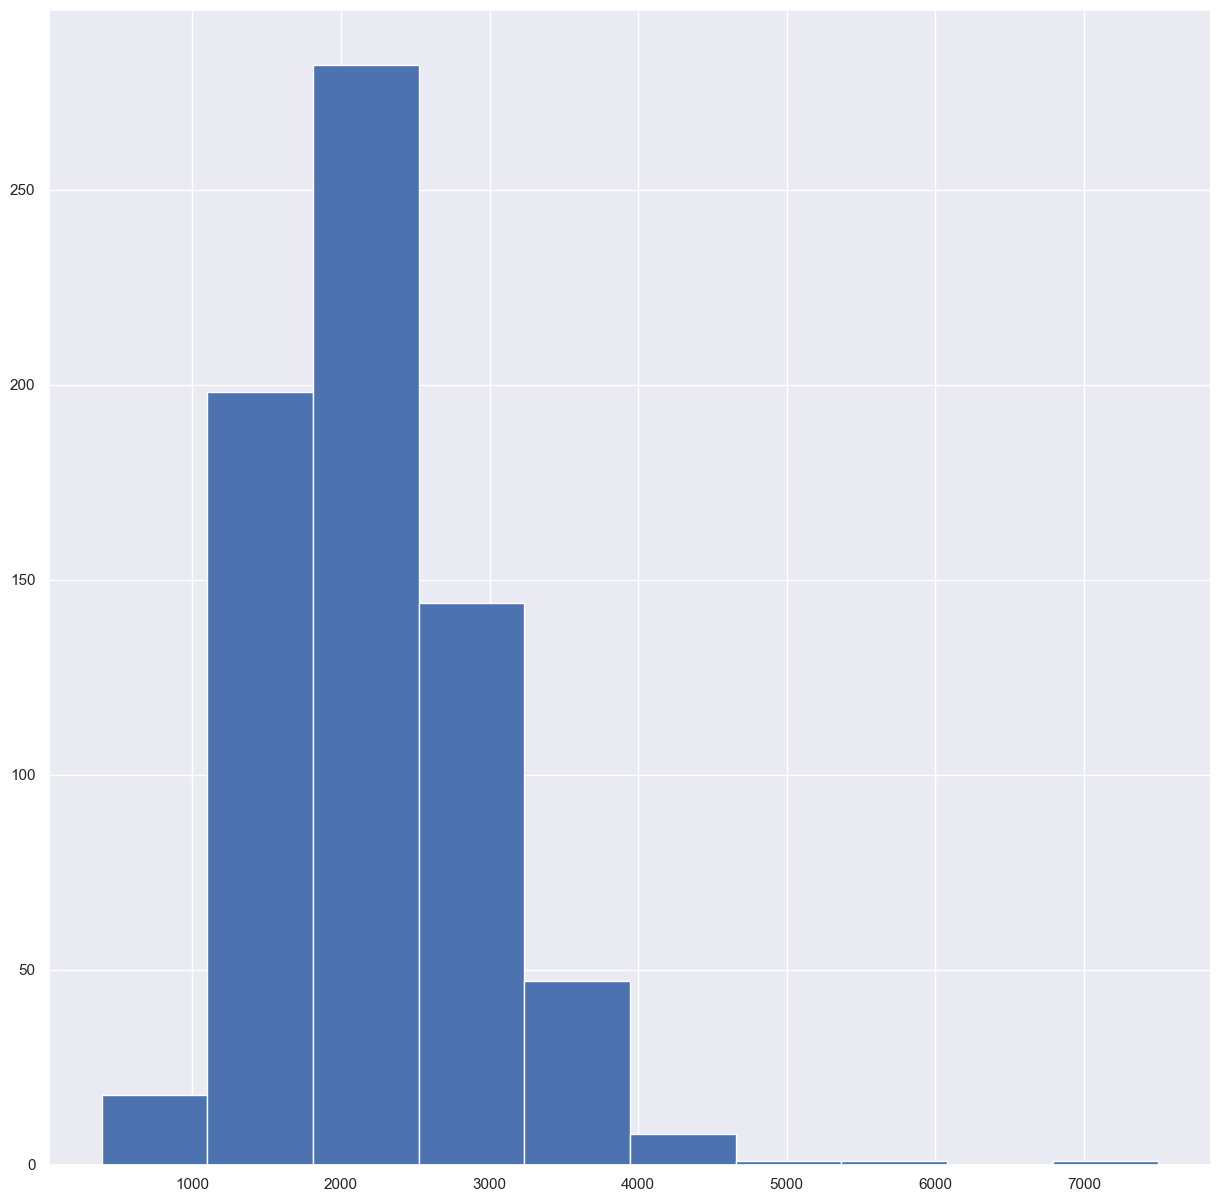

In [12]:
plt.hist(df['priceByArea'])
plt.show()

In [13]:
df_temp = df
# 
color_scale = [(0, 'blue'), (1,'red')]
fig = px.scatter_mapbox(df_temp, 
                        lat="latitude", 
                        lon="longitude", 
                        hover_name="priceByArea", 
                        hover_data=["priceByArea","price","size","rooms","url"],
                        color="priceByArea",
                        color_continuous_scale=color_scale,
                        size="rooms",
                        zoom=13,
                        height=800,
                        width=800)
# fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(mapbox_style="carto-positron") 
# fig.update_layout(mapbox_style="stamen-terrain")
# fig.update_layout(mapbox_style="satellite") -> Need Mapbox API
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [14]:
df.sort_values(by='priceByArea', ascending = True)
df_temp = df[df['priceByArea'] < 1400]
# 
color_scale = [(0, 'blue'), (1,'red')]
fig = px.scatter_mapbox(df_temp, 
                        lat="latitude", 
                        lon="longitude", 
                        hover_name="priceByArea", 
                        hover_data=["priceByArea","price","size","rooms","url"],
                        color="price",
                        color_continuous_scale=color_scale,
                        size="priceByArea",
                        zoom=13,
                        height=800,
                        width=800)
# fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(mapbox_style="carto-positron") 
# fig.update_layout(mapbox_style="stamen-terrain")
# fig.update_layout(mapbox_style="satellite") -> Need Mapbox API
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [23]:
df_temp = df[df['priceByArea'] < 2000]
# df_temp = df_temp[df_temp['price'] < 100000]

# 
color_scale = [(0, 'blue'), (1,'red')]
fig = px.scatter_mapbox(df_temp, 
                        lat="latitude", 
                        lon="longitude", 
                        hover_name="price", 
                        hover_data=["priceByArea","price","size","rooms","url","propertyCode"],
                        color="priceByArea",
                        color_continuous_scale=color_scale,
                        size="price",
                        zoom=13,
                        height=800,
                        width=800)
# fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(mapbox_style="carto-positron") 
# fig.update_layout(mapbox_style="stamen-terrain")
# fig.update_layout(mapbox_style="satellite") -> Need Mapbox API
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [16]:
fig.write_image("price_heatmap.png") 

In [17]:
df_temp[df_temp['size']>100]['url']

2      https://www.idealista.com/inmueble/97504416/
3      https://www.idealista.com/inmueble/96363274/
6      https://www.idealista.com/inmueble/98015346/
7      https://www.idealista.com/inmueble/98671983/
10     https://www.idealista.com/inmueble/98568742/
                           ...                     
690    https://www.idealista.com/inmueble/83651355/
691    https://www.idealista.com/inmueble/97111729/
692    https://www.idealista.com/inmueble/82276988/
693    https://www.idealista.com/inmueble/81752587/
696    https://www.idealista.com/inmueble/95969022/
Name: url, Length: 226, dtype: object

In [18]:
df[(df['price']==200000) & (df['priceByArea']==1961)]['url']

61     https://www.idealista.com/inmueble/97827864/
495    https://www.idealista.com/inmueble/99139846/
Name: url, dtype: object

In [19]:
df[df['price']==80000]['url']

4      https://www.idealista.com/inmueble/98951857/
35     https://www.idealista.com/inmueble/98730461/
500    https://www.idealista.com/inmueble/99128660/
Name: url, dtype: object

In [20]:
df[df['price']==80000].iloc[0]

Unnamed: 0                                                                                    4
propertyCode                                                                           98951857
thumbnail                                     https://img3.idealista.com/blur/WEB_LISTING/0/...
externalReference                                                                         08629
numPhotos                                                                                    16
floor                                                                                         2
price                                                                                   80000.0
propertyType                                                                               flat
operation                                                                                  sale
size                                                                                       60.0
exterior                                

In [21]:
df[df['propertyCode']==99269703]['url']

580    https://www.idealista.com/inmueble/99269703/
Name: url, dtype: object

In [22]:
df[df['price']<80000][['url','price','size','suggestedTexts.title']]

,url,price,size,suggestedTexts.title
129,https://www.idealista.com/inmueble/97484683/,74000.0,52.0,Piso en ANTONIO PEDREIRA RIOS
278,https://www.idealista.com/inmueble/99130874/,75000.0,60.0,Piso
358,https://www.idealista.com/inmueble/94451681/,48000.0,85.0,Chalet pareado en Lugar Lamadosa
419,https://www.idealista.com/inmueble/98131098/,69000.0,48.0,Piso en Calle Cardenal Cisneros
453,https://www.idealista.com/inmueble/98400091/,65000.0,142.0,Casa de pueblo en Comeanda
472,https://www.idealista.com/inmueble/97610978/,79000.0,32.0,Piso
529,https://www.idealista.com/inmueble/94760209/,63000.0,79.0,"Piso en Avenida Nostian, 3"
543,https://www.idealista.com/inmueble/98661141/,79000.0,64.0,Piso en ANTONIO PEREIRA
556,https://www.idealista.com/inmueble/98726184/,60000.0,98.0,Chalet adosado en Calle O PORTALON
564,https://www.idealista.com/inmueble/89845163/,79000.0,25.0,Piso en Calle Montes
